# Efficiency in integer interval DEA



\begin{eqnarray}\label{prob: IDEA}
\mbox{(IDEA)}\ \ {I}(X_p, Y_p)= 
&\mbox{Max} & {\displaystyle\sum_{i=1}^{M} \frac{\underline{s_i^x}+\overline{s_i^x}}{\underline{x_{ip}}+\overline{x_{ip}}} +
\sum_{r=1}^{S} \frac{\underline{s_r^y}+\overline{s_r^y}}{\underline{y_{rp}}+\overline{y_{rp}}}}
\\[0.25em]
&\mbox{s.t.} & {\displaystyle\sum_{j=1}^{N}} \lambda_j {x}_{ij} \preceq {x}_{ip} - s_i^x ,\quad i=1,\dots, M,
\nonumber\\[0.25em]
&& {\displaystyle\sum_{j=1}^{N}} \lambda_j {y}_{rj} \succeq {y}_{rp} + s_r^y ,\quad r=1,\dots, S,
\nonumber\\[0.25em]
&& \lambda_j \geq 0 ,\quad j=1,\dots, N, \nonumber \\[0.25em]
&& s_i^x ,s_r^y \in \mathcal{K}_{\mathbb{Z}_{+}}, \quad i=1,\dots, M, \ \ r=1,\dots, S. \nonumber
\end{eqnarray}

where both inputs $x_{ij} = [\underline{x_{ij}},\overline{x_{ij}}]_{\mathbb{Z}}$, and outputs $y_{rj}=[\underline{y_{rj}},\overline{y_{rj}}]_{\mathbb{Z}}$ are non-negative integer intervals, $\mathcal{K}_{\mathbb{Z}_{+}}, \ \ \forall i,j,r$. 

Lets denote a feasible solution for (IDEA) as $({ s^{x*}},{ s^{y*}},{ \lambda^*})$, where 
${ s^{x*}} = (s_1^{x*},\ldots,s_M^{x*})\in (\mathcal{K}_{\mathbb{Z}_{+}} )^M$, 
${ s^{y*}} = (s_1^{y*},\ldots,s_S^{y*})\in (\mathcal{K}_{\mathbb{Z}_{+}} )^S$, and
${ \lambda^*} = (\lambda_1^*,\ldots,\lambda_N^*)\in (\mathbb{R})^N$.




## Example: 


In [247]:
K = 2 # interval DEA: [a-,a+]
N = 5 # DMUs
M = 2 # inputs X
S = 1 # outputs Y

# DATA: based on the Hsiao et al (2011)'s example
X <- array(c(11,13, 8,10, 
             14,15, 6,7, 
             16,17, 7,8,
             18,20, 4,7,
             19,20, 6,7), c(K,M,N)) 
#
Y <- array(c(10,10, 
                   10,10,
                   10,10,
                   10,10,
                   10,10),c(K,S,N)) 



In [248]:
# Understand the structure:
# First fuzzy element for each input of each DMU:
X[1,,]

11,14,16,18,19
8,6,7,4,6


In [249]:
# First DMU:
X[,,1]

11,8
13,10


In [250]:
# Second input for each DMU:
X[,2,]

8,6,7,4,6
10,7,8,7,7


**Notes:**
<font color='blue'>For computational purposes, and to simplify notation, let use the equivalent one:</font>
$\color{blue}{\tilde{a} = (\underline{a},\overline{a}) \equiv  (a_1,a_2)}$



# Parameterized (IIDEA) model,

\begin{eqnarray}\label{prob: PIDEA}
\mbox{(PIDEA)}\ \ {I}(X_p, Y_p)= 
&\mbox{Max} & {\displaystyle\sum_{i=1}^{M} \frac{\underline{s_i^x}+\overline{s_i^x}}{\underline{x_{ip}}+\overline{x_{ip}}} +
\sum_{r=1}^{S} \frac{\underline{s_r^y}+\overline{s_r^y}}{\underline{y_{rp}}+\overline{y_{rp}}}}
\\[0.25em]
&\mbox{s.t.} & {\displaystyle\sum_{j=1}^{N}} \lambda_j \underline{x_{ij}} \leq \underline{x_{ip}} - \underline{s_i^x} ,\quad i=1,\dots, M,
\nonumber\\[0.25em]
&& {\displaystyle\sum_{j=1}^{N}} \lambda_j \overline{x_{ij}} \leq \overline{x_{ip}} - \overline{s_i^x} ,\quad i=1,\dots, M,
\nonumber\\[0.25em]
&& {\displaystyle\sum_{j=1}^{N}} \lambda_j \underline{y_{rj}} \geq \underline{y_{rp}} + \underline{s_r^y} ,\quad r=1,\dots, S,
\nonumber\\[0.25em]
&& {\displaystyle\sum_{j=1}^{N}} \lambda_j \overline{y_{rj}} \geq \overline{y_{rp}} + \overline{s_r^y} ,\quad r=1,\dots, S,
\nonumber\\[0.25em]
&& \underline{s_i^x} \leq \overline{s_i^x} ,\quad i=1,\dots, M,
\nonumber\\[0.25em]
&& \underline{s_r^y} \leq \overline{s_r^y} ,\quad r=1,\dots, S,
\nonumber\\[0.25em]
&& \lambda_j \geq 0 ,\quad j=1,\dots, N, \nonumber \\[0.25em]
&& \underline{s_i^x},\overline{s_i^x},\underline{s_r^y},\overline{s_r^y} \in \mathbb{Z}_+, \quad i=1,\dots, M, \ \ r=1,\dots, S. \nonumber
\end{eqnarray}



There are $N+2(M+S)$ variables, and $3(M+S)$ constraints.

In [251]:
# There are 
NV = N+(M+S)*2 # variables, and
NC = 3*(M+S) # constraints

NV; NC

[1] 11

[1] 9

**NOTE:** To solve the above problem with lp (lpSolve package), we need to transform it in matrix notation:  

\begin{eqnarray*}
\ \ &\mbox{Max} & Cx  \\
&s.t.& Ax \leq b,  \\
&& x\geq 0
\end{eqnarray*}

where, $x = (\lambda_1,\ldots,\lambda_N,
\underline{s_1^x},\overline{s_1^x},\ldots,\underline{s_M^x},\overline{s_M^x},
\underline{s_1^y},\overline{s_1^y},\ldots,\underline{s_S^y},\overline{s_S^y})$

### Example (continuation):

PIIDEA for this example is, for DMU $p=1$

\begin{eqnarray}
(PIIDEA)\ \ I(\tilde{X}_1, \tilde{Y}_1)= \ \ & {Max}\ \ & \ \ 
\frac{\underline{s_1^x}+\overline{s_1^x}}{11+13} + \frac{\underline{s_2^x}+\overline{s_2^x}}{8+10} +
\frac{\underline{s_1^y}+\overline{s_1^y}}{10+10}
\\[1em]
&\mbox{s.t.} & 
\left. \begin{array}{lcr}
11\lambda_1 + 14\lambda_2 + 16\lambda_3 + 18\lambda_4 + 19\lambda_5 &\leq& 11 - \underline{s_1^x} \\
13\lambda_1 + 15\lambda_2 + 17\lambda_3 + 20\lambda_4 + 20\lambda_5 &\leq& 13 - \overline{s_1^x}
\end{array} \right\} \ \ i=1
\nonumber\\[1em]
&&  \left. \begin{array}{lcr}
8\lambda_1 + 6\lambda_2 + 7\lambda_3 + 4\lambda_4 + 6\lambda_5 &\leq& 8 - \underline{s_2^x} \\
10\lambda_1 + 7\lambda_2 + 8\lambda_3 + 7\lambda_4 + 7\lambda_5 &\leq& 10 - \overline{s_2^x}
\end{array} \right\} \ \ i=2
\nonumber\\[1em]
&& \left. \begin{array}{lcr}
10\lambda_1 + 10\lambda_2 + 10\lambda_3 + 10\lambda_4 + 10\lambda_5 &\geq& 10 + \underline{s_1^y} \\  
10\lambda_1 + 10\lambda_2 + 10\lambda_3 + 10\lambda_4 + 10\lambda_5 &\geq& 10 + \overline{s_1^y}\\  
\end{array} \right\} \ \ r=1
\nonumber\\[1em]
&& \underline{s_i^x} \leq \overline{s_i^x} \quad i=1,2,
\nonumber\\
&& \underline{s_r^y} \leq \overline{s_r^y} \quad r=1,
\nonumber\\
&& \lambda_j \geq 0 ,\quad j=1,\dots, 5 \nonumber
\end{eqnarray}



To solve the above problem with lp (lpSolve package), we need to transform it in matrix notation:  

\begin{eqnarray*}
\ \ &\mbox{Max } & Cx \\
&s.t.& Ax \leq b,  \\
&& x\geq 0, \ \ x \in \mathbb{R}^{18}
\end{eqnarray*}

where, 

$x = \begin{pmatrix}
      \lambda_1 & \lambda_2 & \lambda_3 & \lambda_4 & \lambda_5 &
      \underline{s_1^x}&\overline{s_1^x} &\underline{s_2^x}&\overline{s_2^x}&
       \underline{s_1^y}&\overline{s_1^y}
\end{pmatrix}
$

$A = \left(\begin{array}{ccccc | cccccc}
  \lambda_1 & \lambda_2 & \lambda_3 & \lambda_4 & \lambda_5 &
  \underline{s_1^x}&\overline{s_1^x} &\underline{s_2^x}&\overline{s_2^x}&
       \underline{s_1^y}&\overline{s_1^y} \\
       \hline
   11& 14& 16& 18& 19& 1& 0& 0& 0&0 &0 \\
   13& 15& 17& 20& 20& 0& 1& 0& 0& 0& 0 \\
   8& 6& 7& 4& 6& 0& 0& 1& 0& 0 & 0 \\
   10& 7& 8& 7& 7& 0& 0& 0& 1& 0 & 0 \\
   %\hline
   10&10 & 10&10 &10 & 0& 0& 0& 0& -1 & 0 \\
    10&10 & 10&10 &10 & 0& 0& 0& 0& 0 & -1 \\
   \hline
   0&0 &0 &0 &0 & 1&-1 &0 &0 & 0&0  \\
   0&0 &0 &0 &0 & 0&0 &1&-1 & 0&0  \\
   %\hline
   0&0 &0 &0 &0 & 0&0 &0 &0 &1&-1  \\
 \end{array} \right)
 \begin{matrix}
  \\ \leq \\ \leq \\ \leq \\ \leq \\ 
 \geq \\ \geq \\ 
 \leq \\ \leq \\ \leq 
 \end{matrix}
 \quad 
 b = \begin{pmatrix}
 \\ 11 \\ 13 \\ 8 \\ 10 \\ 10 \\ 10 \\
 0 \\ 0 \\ 0 
\end{pmatrix}
$

and 

$
C = \begin{pmatrix}
  0 & 0 & 0 & 0 & 0 &
  \frac{1}{24} &  \frac{1}{24} & \frac{1}{18} & \frac{1}{18} & 
   \frac{1}{20} &  \frac{1}{20} 
\end{pmatrix}
$





Column indexes: 

$\lambda_j, \ \ j=1,\ldots,N \quad : A[,j]$ 

$\underline{s^x_{i}}, \ \ i=1,\ldots,M, \ \ : A[,N+2*(i-1)+1]$ 

$\overline{s^x_{i}}, \ \ i=1,\ldots,M, \ \ : A[,N+2*(i-1)+2]$ 

$\underline{s^y_{r}}, \ \ r=1,\ldots,S, \ \ : A[,N+2*M+2*(r-1)+1]$ 

$\overline{s^y_{r}}, \ \ r=1,\ldots,S, \ \ : A[,N+2*M+2*(r-1)+2]$ 



In [266]:
# Find the optimal solution for each DMU
library("lpSolve")
library("MASS")

# Define variable arrays, for each DMU (N):
IDEA = array(0,N)
lambda = array(0,c(N,N))
sx = array(0,c(N,M*2))
sy = array(0,c(N,S*2))


# Constraints matrix A, by blocks: (same matrix for each DMU --> outisde the loop)
A = array(0,c(NC,NV))

A[1:(2*M),1:N] = matrix(c(X[,1:M,]),ncol=N,nrow=2*M,byrow=FALSE)
A[(2*M+1):(2*M+2*S),1:N] = matrix(c(Y[,1:S,]),ncol=N,nrow=2*S,byrow=FALSE)
A[1:(2*M),(N+1):(N+2*M)] = diag(1,2*(M))
A[(2*M+1):(2*M+2*S),(N+2*M+1):NV] = -diag(1,2*(S))
                                  
for(i in 1:M){
    A[2*(M+S)+i,N+(i-1)*2+1] = 1
    A[2*(M+S)+i,N+(i-1)*2+2] = -1
} 

for(r in 1:S){
    A[3*M+2*S+r,N+2*M+(r-1)*2+1] = 1
    A[3*M+2*S+r,N+2*M+(r-1)*2+2] = -1
} 



for(dmu in 1:N){
    ## Set the coefficients of the decision variables -> C
    C <- c(rep(0,N))
    for(i in 1:M) C <- c(C,rep(1/sum(X[,i,dmu]),2))
    for(r in 1:S) C <- c(C,rep(1/sum(Y[,r,dmu]),2))
    
    # Right hand side for the constraints
    B <- c(X[,,dmu],Y[,,dmu],rep(0,M+S))
    
    # Direction of the constraints
    constraints_direction  <- c(rep("<=",M*2), rep(">=",S*2), 
                               rep("<=",M+S)) 
    
    optimum <-  lp(direction="max",
                 objective.in = C,
                 const.mat = A,
                 const.dir = constraints_direction,
                 const.rhs = B, #,
                 #all.int = TRUE,
                 #int.vec = seq(N+1:NV)
                  )

    # LMFERM solution: 
    sol.IIDEA <- optimum$solution
    
    IDEA[dmu] = optimum$objval
    lambda[dmu,] = sol.IIDEA[1:N]
    sx[dmu,] = sol.IIDEA[(N+1):(N+M)]
    sy[dmu,] = sol.IIDEA[(N+2*M+1):(NV)]
    
}


### checking solutions:
#fractions(IDEA)
#lambda
#sx 
#sy

In [265]:
# Giving the RESULTS all togthere into a dataframe: 
data.frame(DMU = seq(1:N),IDEA=IDEA,lambda=lambda,sx1=sx[,1:2],sx2=sx[,3:4],sy=sy)

DMU,IDEA,lambda.1,lambda.2,lambda.3,lambda.4,lambda.5,sx1.1,sx1.2,sx2.1,sx2.2,sy.1,sy.2
1,0.0000000,1,0,0,0,0,0,0,0,0,0,0
2,0.0000000,0,1,0,0,0,0,0,0,0,0,0
3,0.2545455,0,1,0,0,0,2,2,2,2,0,0
4,0.0000000,0,0,0,1,0,0,0,0,0,0,0
5,0.2564103,0,1,0,0,0,5,5,5,5,0,0


### PLOTTING the Example:

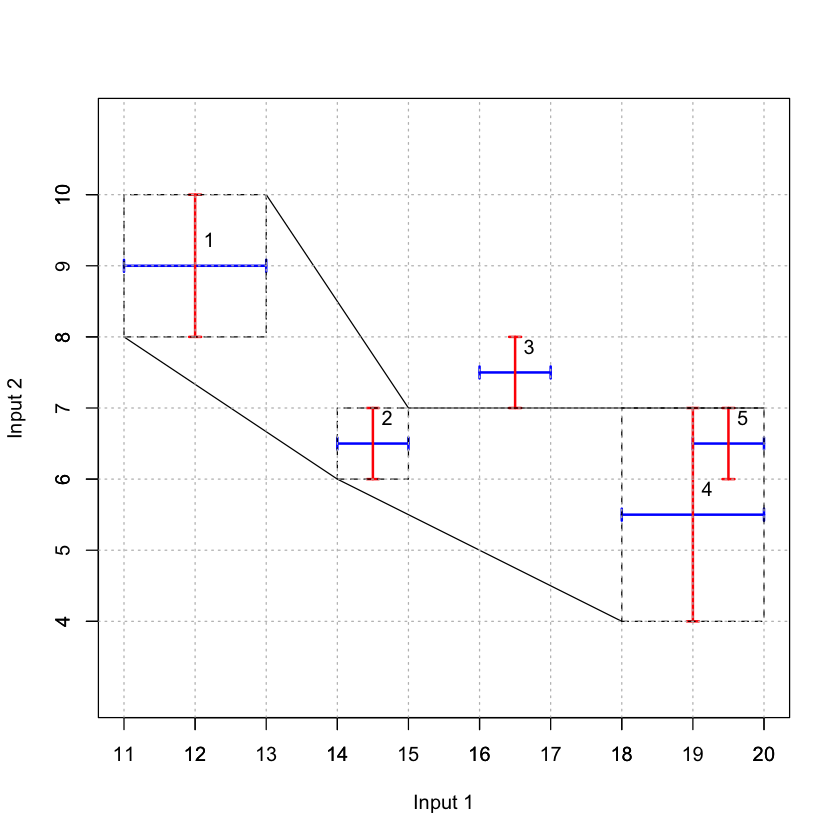

In [246]:
# X : array c(K,M,N); Y array c(K,S,N)
midX = (X[1,1,]+X[2,1,])/2
midY = (X[1,2,]+X[2,2,])/2

plot(midX,midY, pch='',
     xlim=range(X[,1,]),ylim=range(X[,2,]),
     asp=1, #same aspect(scale) both axis,
     xlab = "Input 1",ylab="Input 2")
axis(side=1, at=seq(min(X[,1,]),max(X[,1,])))
axis(side=2, at=seq(min(X[,2,]),max(X[,2,])))
arrows(x0=X[1,1,], y0=midY, x1=X[2,1,], y1=midY, code=3, angle=90, length=0.05, col="blue", lwd=2)
arrows(x0=midX, y0=X[1,2,], x1=midX, y1=X[2,2,], code=3, angle=90, length=0.05, col="red", lwd=2)
text(midX+0.2, midY+0.1, labels=seq(1:N), cex= 1,pos=3)
#lines(midX[which(IDEA==0)],midY[which(IDEA==0)])
lines(X[1,1,which(IDEA==0)],X[1,2,which(IDEA==0)])
lines(X[2,1,which(IDEA==0)],X[2,2,which(IDEA==0)])
for(n in 1:length(which(IDEA==0))){
    polygon(c(X[,1,which(IDEA==0)[n]],rev(X[,1,which(IDEA==0)[n]])),
            rep(X[,2,which(IDEA==0)[n]],each=2), lty=2)
}

#grid()
abline(v=seq(min(X[,1,]),max(X[,1,])), col="grey", lty="dotted")
abline(h=seq(min(X[,2,]),max(X[,2,])), col="grey", lty="dotted") 

In [217]:
# TRY WITH ANOTHER EXAMPLE: ...

X <- array(c(11,13, 8,10, 
             14,15, 6,7, 
             16,17, 7,8,
             18,20, 5,6,
             17,19, 6,7), c(K,M,N)) 

In [ ]:
# PHASE II